# Adding Sequences to the Data Table

As per 2023-03-02_logbook.md I want to both add data files contained in sequence directories to the main data table when that is constructed AND add a column to the data table denoting which sequence the data came from, or "single run" if the data was obtained outside of a sequence.

It is tasks such as this which big for an OOP approach to handlnig the data, but that is still a little bit away as I'm not 100% on Python OOP.

First let's generate the data table.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

from pathlib import Path

import pandas as pd

import rainbow as rb

import numpy as np

from scripts.core_scripts.data_interface import retrieve_uv_data

from scripts.core_scripts.data_interface import data_table

from scripts.core_scripts.hplc_dad_plots import plot_3d_line

In [2]:
p = Path("/Users/jonathan/0_jono_data")

First gen the table.

In [3]:
data_table(p).head()

,data,num_detect_files,method,acquisition_date
name,,,,
COFFEE_COLUMN_CHECK.D,2023-02-15_COFFEE_COLUMN_CHECK.D: DAD1D.ch - D...,7,WINE-AVANTOR100X4_6C18-H2O-MEOH-2_1.M,2023-02-15 13:07:59
14-59-17_NC1.D,2023-02-09_14-59-17_NC1.D: DAD1D.ch - DAD1E.ch...,7,2023-02-09_COLUMN_TEST_COFFEE_SHORT.M,2023-02-09 15:00:46
WINE_TEST_GRAD_2.D,2023-01-23_WINE_TEST_GRAD_2.D: DAD1A.ch,1,2023-01-23_WINE_GRADIENT_2.M,2023-01-23 16:22:22
COFFEE-TEST_2.D,2023-01-23_COFFEE-TEST_2.D: DAD1A.ch,1,2023-01-23_COFFEE_TEST.M,2023-01-23 14:53:30
2021-DEBORTOLI-CABERNET-MERLOT_AVANTOR.D,2023-02-23_2021-DEBORTOLI-CABERNET-MERLOT_AVAN...,7,AVANTOR100X4_6C18-H2O-MEOH-2_1.M,2023-02-23 12:22:35


In [4]:
datadir_p = Path('/Users/jonathan/0_jono_data/2023-02-23_2021-DEBORTOLI-CABERNET-MERLOT_AVANTOR.D')

datadir = rb.read(str(datadir_p))

In [5]:
datadir.__dict__

{'name': '2023-02-23_2021-DEBORTOLI-CABERNET-MERLOT_AVANTOR.D',
 'datafiles': [DAD1D.ch,
  DAD1E.ch,
  DAD1A.ch,
  DAD1F.ch,
  DAD1B.ch,
  DAD1C.ch,
  DAD1.UV],
 'detectors': {'UV'},
 'by_name': {'DAD1D.CH': DAD1D.ch,
  'DAD1E.CH': DAD1E.ch,
  'DAD1A.CH': DAD1A.ch,
  'DAD1F.CH': DAD1F.ch,
  'DAD1B.CH': DAD1B.ch,
  'DAD1C.CH': DAD1C.ch,
  'DAD1.UV': DAD1.UV},
 'by_detector': {'UV': [DAD1D.ch,
   DAD1E.ch,
   DAD1A.ch,
   DAD1F.ch,
   DAD1B.ch,
   DAD1C.ch,
   DAD1.UV]},
 'analog': [],
 'metadata': {'vendor': 'Agilent',
  'date': '23-Feb-23, 12:22:35',
  'vialpos': 'Vial 1'}}

There doesnt seem to be a way to get the sample name specifically, so we should instead pull the sample name from the `SAMPLE.XML` field `<Name>`. At the same time we can pull the `<Description>` as well. Now, how to manipulate XML files in Python?

## Working with XML files in Python

### Getting Set Up

According to [this article](https://www.geeksforgeeks.org/reading-and-writing-xml-files-in-python/) BeautifulSoup and Elementtree can both be used to Parse XML files. ~~I think Elementtree is what the rainbow-api devs used~~ *Actually, they use etree from lxml*, however, BeautifulSoup is ubiquitous in the greater world, so I will use that.

### Parsing an XML File

When parsing an XML file, you first find a *tag* then extract from it:

In [6]:
from bs4 import BeautifulSoup

In [7]:
with open(datadir_p / r"SAMPLE.XML", encoding="utf8", errors='ignore') as f:
    
    data = f.read()
    
    print(data)

< ? x m l   v e r s i o n = " 1 . 0 " ? > 
 
 < S a m p l e > 
 
     < V e r s i o n > 2 < / V e r s i o n > 
 
     < N a m e > 2 0 2 1 - d e b o r t o l i - c a b e r n e t - m e r l o t _ a v a n t o r < / N a m e > 
 
     < A m o u n t > 1 < / A m o u n t > 
 
     < M u l t i p l i e r > 1 < / M u l t i p l i e r > 
 
     < D i l u t i o n > 1 < / D i l u t i o n > 
 
     < D e s c r i p t i o n > a v a n t o r   1 5 0   x   
 
 4 . 6   C 1 8   H 2 O   M E O H   2 . 1 %     g r a d i e n t < / D e s c r i p t i o n > 
 
     < I S T D s > 
 
         < I S T D   N u m = " 1 " > 0 < / I S T D > 
 
     < / I S T D s > 
 
     < T a r g e t M a s s e s   / > 
 
     < R e f D a t a F i l e P a t h > < / R e f D a t a F i l e P a t h > 
 
     < A C Q M e t h o d P a t h > C : \ C H E M 3 2 \ 1 \ M E T H O D S \ 0 _ J O N O _ M E T H O D S \ A V A N T O R 1 0 0 X 4 _ 6 C 1 8 - H 2 O - M E O H - 2 _ 1 . M < / A C Q M e t h o d P a t h > 
 
     < D A M e t h o d P a t h > C : \ C 

We've established that we can read the data. Now to use it.

In [8]:
Bs_data = BeautifulSoup(data, "xml")
Bs_data.prettify()

'<?xml version="1.0" encoding="utf-8"?>\n'

In [9]:
b_unique = Bs_data.find_all("unique")

b_name = Bs_data.find('Sample')

print(b_name)

None


Problem - due to the way its encoded, I don't think BeautifulSoup is parsing it correctly. According to [this stackoverflow post](https://stackoverflow.com/questions/17534932/how-to-verify-xml-encoding) I can check the encoding by reading the first eight bytes of the file. I can either do that with a HEX editor or through Python directly with the 'b' argument in `read()`:

In [10]:
with open(datadir_p / r"SAMPLE.XML", 'rb') as f:
    
    data = f.read(8)
    
    print(data)

b'\xff\xfe<\x00?\x00x\x00'


Doesn't provide what I was expecting.

On another tack, looking at the rainbow code [here](https://github.com/evanyeyeye/rainbow/blob/main/rainbow/agilent/chemstation.py), I can see that it does parse the xml files, but it appears to be looking for a AcqData directory which is not present in my data files. Perhaps Agilent changed how the files are structured.

Pivoting back to the XML problem, inspecting the files in the terminal with bat showed that the `SAMPLE.XML` file is encoded with UTF-16LE. Maybe try that as a setting?

In [11]:
with open(datadir_p / r"SAMPLE.XML", 'r', encoding = 'UTF-16LE') as f:
    
    data = f.read()
    
    print(data)

﻿<?xml version="1.0"?>
<Sample>
  <Version>2</Version>
  <Name>2021-debortoli-cabernet-merlot_avantor</Name>
  <Amount>1</Amount>
  <Multiplier>1</Multiplier>
  <Dilution>1</Dilution>
  <Description>avantor 150 x 
4.6 C18 H2O MEOH 2.1%  gradient</Description>
  <ISTDs>
    <ISTD Num="1">0</ISTD>
  </ISTDs>
  <TargetMasses />
  <RefDataFilePath></RefDataFilePath>
  <ACQMethodPath>C:\CHEM32\1\METHODS\0_JONO_METHODS\AVANTOR100X4_6C18-H2O-MEOH-2_1.M</ACQMethodPath>
  <DAMethodPath>C:\CHEM32\1\METHODS\0_JONO_METHODS\AVANTOR100X4_6C18-H2O-MEOH-2_1.M</DAMethodPath>
</Sample>


That seems happier?

In [12]:
Bs_data = BeautifulSoup(data, "xml")
print(Bs_data.prettify())

<?xml version="1.0" encoding="utf-8"?>
<Sample>
 <Version>
  2
 </Version>
 <Name>
  2021-debortoli-cabernet-merlot_avantor
 </Name>
 <Amount>
  1
 </Amount>
 <Multiplier>
  1
 </Multiplier>
 <Dilution>
  1
 </Dilution>
 <Description>
  avantor 150 x 
4.6 C18 H2O MEOH 2.1%  gradient
 </Description>
 <ISTDs>
  <ISTD Num="1">
   0
  </ISTD>
 </ISTDs>
 <TargetMasses/>
 <RefDataFilePath/>
 <ACQMethodPath>
  C:\CHEM32\1\METHODS\0_JONO_METHODS\AVANTOR100X4_6C18-H2O-MEOH-2_1.M
 </ACQMethodPath>
 <DAMethodPath>
  C:\CHEM32\1\METHODS\0_JONO_METHODS\AVANTOR100X4_6C18-H2O-MEOH-2_1.M
 </DAMethodPath>
</Sample>


Yes, that's working.

In [13]:
b_sample = Bs_data.find('Sample')

print(b_sample)

<Sample>
<Version>2</Version>
<Name>2021-debortoli-cabernet-merlot_avantor</Name>
<Amount>1</Amount>
<Multiplier>1</Multiplier>
<Dilution>1</Dilution>
<Description>avantor 150 x 
4.6 C18 H2O MEOH 2.1%  gradient</Description>
<ISTDs>
<ISTD Num="1">0</ISTD>
</ISTDs>
<TargetMasses/>
<RefDataFilePath/>
<ACQMethodPath>C:\CHEM32\1\METHODS\0_JONO_METHODS\AVANTOR100X4_6C18-H2O-MEOH-2_1.M</ACQMethodPath>
<DAMethodPath>C:\CHEM32\1\METHODS\0_JONO_METHODS\AVANTOR100X4_6C18-H2O-MEOH-2_1.M</DAMethodPath>
</Sample>


And to access the name?

In [14]:
name = b_sample.find('Name')
name

<Name>2021-debortoli-cabernet-merlot_avantor</Name>

Ok, but how do I get that out as a string?

In [15]:
type(name)

bs4.element.Tag

try `str()`

In [16]:
str(name)

'<Name>2021-debortoli-cabernet-merlot_avantor</Name>'

That doesn't work. What about [soup's documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)? It mentions a `get_text()` method

In [17]:
name_str = name.get_text()
name_str

'2021-debortoli-cabernet-merlot_avantor'

In [18]:
type(name_str)

str

And there we go.

## OOP Data

Fuck it, let's do it.

In [19]:
data

'\ufeff<?xml version="1.0"?>\n<Sample>\n  <Version>2</Version>\n  <Name>2021-debortoli-cabernet-merlot_avantor</Name>\n  <Amount>1</Amount>\n  <Multiplier>1</Multiplier>\n  <Dilution>1</Dilution>\n  <Description>avantor 150 x \n4.6 C18 H2O MEOH 2.1%  gradient</Description>\n  <ISTDs>\n    <ISTD Num="1">0</ISTD>\n  </ISTDs>\n  <TargetMasses />\n  <RefDataFilePath></RefDataFilePath>\n  <ACQMethodPath>C:\\CHEM32\\1\\METHODS\\0_JONO_METHODS\\AVANTOR100X4_6C18-H2O-MEOH-2_1.M</ACQMethodPath>\n  <DAMethodPath>C:\\CHEM32\\1\\METHODS\\0_JONO_METHODS\\AVANTOR100X4_6C18-H2O-MEOH-2_1.M</DAMethodPath>\n</Sample>'

In [20]:
from datetime import datetime

"""
a prototyped class definition using bits of rainbow and bits of direct XML parsing.

I'll keep building it from here as my use case increases, but it is barebones atm.

"""

class Data:
        
    def __init__(self, file_path):
        self.file_path = file_path
        self.name = self.load_meta_data()[0]
        self.description = self.load_meta_data()[1]
        self.rainbow = self.rb_object()
        self.uv_data = retrieve_uv_data(rb.read(str(self.file_path)))
        self.method = self.rainbow.datafiles[0].metadata['method']
        self.acq_date = datetime.strptime(self.rainbow.metadata['date'], "%d-%b-%y, %H:%M:%S")
        self.sequence_name = self.sequence_name()
        
    def sequence_name(self):
        if ".sequence" in self.file_path.parent.name:
            return self.file_path.parent.name
        else:
            return "single run"
        
    def load_meta_data(self):
        
        """
        atm this loads the name and description from SAMPLE.XML found in .D dirs.
        It also cleans the description string.
        
        Atm it needs to load the whole XML file to read these two tags, which seems inefficient
        but i dont know how to do it otherwise.
        """

        with open(self.file_path / r"SAMPLE.XML", 'r', encoding = 'UTF-16LE') as f:

            xml_data = f.read()
            
            bsoup_xml = BeautifulSoup(xml_data, 'xml')
            
            name = bsoup_xml.find("Name").get_text()
            
            description = bsoup_xml.find("Description").get_text()
            clean_description = description.replace("\n", "").replace(" ", "-").strip()

        return name, clean_description
    
    def rb_object(self):
        """
        loads the whole target data dir, currently it just returns the method and the data.
        """
        rainbow_obj = rb.read(str(self.file_path))
        
        return rainbow_obj
        

a_data_file = Data(datadir_p)

print(a_data_file.name)

2021-debortoli-cabernet-merlot_avantor


In [21]:
a_data_file.sequence_name

'single run'

In [22]:
seq_data_file = Data(Path("/Users/jonathan/0_jono_data/2023-02-16_WINES_2023-02-16_13-46-32.sequence/001-0101.D"))
seq_data_file.sequence_name

'2023-02-16_WINES_2023-02-16_13-46-32.sequence'

In [23]:
a_data_file.method

'AVANTOR100X4_6C18-H2O-MEOH-2_1.M'

<AxesSubplot: xlabel='mins'>

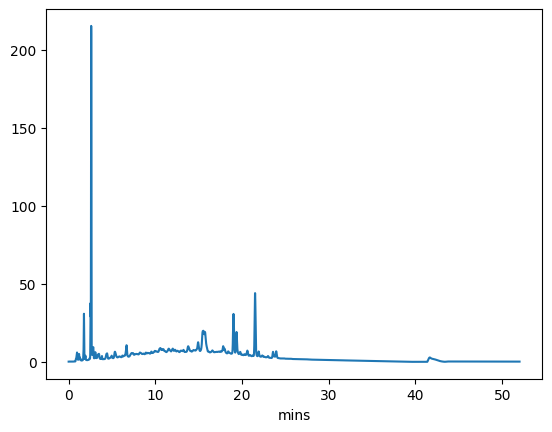

In [24]:
a_data_file.uv_data[350].plot()

In [25]:
str(a_data_file.acq_date)

'2023-02-23 12:22:35'

Now, a top level data dir class could be useful..?

In [26]:
# It will be able to return individual data files, all the single runs, and all the sequences.

class Top_Dir:
    
    def __init__(self, dir_path):
    
        self.path = dir_path
        self.single_runs = self.single_runs()
        self.sequences = self.sequences()
    
    def single_runs(self):
        
        single_run_list = []
        
        for obj in self.path.iterdir():
            
            if obj.name.endswith(".D"):
                
                try:
                    
                    single_run_list.append(obj.name)
        
                except Exception as e:
                    print(f"{e}")
                        
    def sequences(self):
        
        single_run_list = []
        
        for obj in self.path.iterdir():
            
            if obj.name.endswith(".sequence"):
                
                try:
                    
                    single_run_list.append(obj.name)
        
                except Exception as e:
                    print(f"{e}")
    
        return single_run_list

In [27]:
top_dir = Top_Dir(p)

top_dir.sequences

['2022-08-01_CAFFEINE_QUANT_SEQ 2022-08-01 15-53-17.sequence',
 '2023-01-23_wine_degredation_study_data.sequence',
 '2023-02-16_WINES_2023-02-16_13-46-32.sequence',
 '2023-02-15_WINES_2023-02-15_15-19-53.sequence',
 '2022-08-01_CAFFEINE_QUANT_SEQ 2022-08-01 16-04-17.sequence',
 '2023-02-07_WINES.sequence',
 '2023-02-15_WINES_2023-02-15_15-18-24.sequence',
 '2023-01-23_wine_test.sequence',
 '2023-02-15_WINES_2023-02-15_15-08-23.sequence',
 '2023-02-07-WINES.sequence',
 '2023-01-30_WINES 2023-01-30 15-15-45.sequence']

I don't know yet how to handle the sequence data files. Whatever container I use for the data should simply 'unwrap' the sequence directories and store the single run and sequence .D at the same level, keeping track of the origin of the file - "sequence" or "single run".

The answer is to build a class heirarchy corresponding to the file structure. Lets call the application Agilette, a petit Agilent Chemstation imitator.

Agilette
 |  |
 |  |___top_dir
 |              |
 |              |__**sequences*
 |              |
 |              |__*single_runs*
 |
 |__data_table

In [31]:
class Agilette:
    def __init__(self, path = str):
        self.path = path

In [33]:
ag = Agilette("/Users/jonathan/0_jono_data/")
ag.path

'/Users/jonathan/0_jono_data/'

I've reached a point where I should be refactoring this all into .py files. Ill do that now.